# pip install pandas numpy matplotlib seaborn scikit-learn jupyter

1. Then visualize the data (Life Ladder, Log GDP per capita, Freedom to make life choices) - Maybe a line plot
2. Choose an algorithm to train our model using Gridsearch
3. Separate a few years for a prediction 
4. Train the model and validate it (what our validation technique is??)
5. ⁠Create a confusion matrix or a r2 score (Based on our algorithm)

In [103]:
# **DATASET PRE-PROCESSING**
import os
import numpy as np
import pandas as pd

In [104]:
# changed sessions selection from 2005 - 2023 to link with the happiness dataset.
sessions = np.arange(60, 79)
data=[]

for session in sessions:
    directory = "../data/TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
     
        #if filename.index("_") == 1: continue
        #print(filename)
        with open(os.path.join(directory, filename), encoding='utf-8') as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
3660,78,2023,WSM,Samoa extends its congratulations and best wis...
3661,78,2023,YEM,This session of the General Assembly is being ...
3662,78,2023,ZAF,Seventy-eight years ago. in the aftermath of t...
3663,78,2023,ZMB,The world today is overcome with the overlappi...
3664,78,2023,ZWE,I wish to congratulate Mr. Dennis Francis on h...


In [105]:
df_speech.shape
# 4 columns with 3664 rows

df_speech.info()
# from the 'Non-Null Count' column it's seems like we have no missing data

missing_data = df_speech.isnull()
print(missing_data)

missing_sum = missing_data.sum()
print(missing_sum)
# no missing values to be dealt with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Session          3665 non-null   int32 
 1   Year             3665 non-null   int32 
 2   ISO-alpha3 Code  3665 non-null   object
 3   Speech           3665 non-null   object
dtypes: int32(2), object(2)
memory usage: 86.0+ KB
      Session   Year  ISO-alpha3 Code  Speech
0       False  False            False   False
1       False  False            False   False
2       False  False            False   False
3       False  False            False   False
4       False  False            False   False
...       ...    ...              ...     ...
3660    False  False            False   False
3661    False  False            False   False
3662    False  False            False   False
3663    False  False            False   False
3664    False  False            False   False

[3665 rows x 4 colum

In [106]:
df_codes = pd.read_csv('../data/UNSD — Methodology.csv', delimiter=';')
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [107]:
# merge the two dataframes on 'ISO-alpha3 Code'
merged_df = pd.merge(df_codes, df_speech, on="ISO-alpha3 Code")
merged_df = merged_df[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code", "Session", "Year", "Speech"]]

# Set the index to a multindex
merged_df = merged_df.set_index(['Country or Area','Year'])

# Rename the index columns
merged_df = merged_df.rename_axis(['Country name', 'year'])


merged_df.head()

Region Name  Sub-region Name ISO-alpha3 Code  Session  \
Country name year                                                         
Algeria      2005      Africa  Northern Africa             DZA       60   
             2006      Africa  Northern Africa             DZA       61   
             2007      Africa  Northern Africa             DZA       62   
             2008      Africa  Northern Africa             DZA       63   
             2009      Africa  Northern Africa             DZA       64   

                                                              Speech  
Country name year                                                     
Algeria      2005  At\nthis crucial moment, when it is debating q...  
             2006  At a \ntime when the United Nations continues ...  
             2007  I have  the particular pleasure of conveying t...  
             2008  I wish \nat the outset to congratulate Mr. Mig...  
             2009  Allow \nme first to express the pleasure of th...

In [108]:
happinessdataframe = pd.read_excel('../data/DataForTable2.1.xls', index_col=[0,1]) 

print(happinessdataframe.shape)
# 9 columns with 2363 rows

happinessdataframe.info()
# from the 'Non-Null Count' column it's seems like Life ladder is the only column with no missing values

missing_data = happinessdataframe.isnull()
missing_sum = missing_data.sum()
print(missing_sum)
# There are some missing values in this dataset

happinessdataframe.head()

(2363, 9)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2363 entries, ('Afghanistan', 2008) to ('Zimbabwe', 2023)
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       2363 non-null   float64
 1   Log GDP per capita                2335 non-null   float64
 2   Social support                    2350 non-null   float64
 3   Healthy life expectancy at birth  2300 non-null   float64
 4   Freedom to make life choices      2327 non-null   float64
 5   Generosity                        2282 non-null   float64
 6   Perceptions of corruption         2238 non-null   float64
 7   Positive affect                   2339 non-null   float64
 8   Negative affect                   2347 non-null   float64
dtypes: float64(9)
memory usage: 179.2+ KB
Life Ladder                           0
Log GDP per capita                   28
Social support                    

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.350416        0.450662   
             2009     4.401778            7.508646        0.552308   
             2010     4.758381            7.613900        0.539075   
             2011     3.831719            7.581259        0.521104   
             2012     3.782938            7.660506        0.520637   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.500000   
             2009                         50.799999   
             2010                         51.099998   
             2011                         51.400002   
             2012                         51.700001   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.164055   
             2009                      0.678896    0.187297   
             2010                      0.600127    0.117861   
             2011                      0.495901    0.160098   
             2012                      0.530935    0.234157   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.414297         0.258195  
             2009                   0.850035         0.481421         0.237092  
             2010                   0.706766         0.516907         0.275324  
             2011                   0.731109         0.479835         0.267175  
             2012                   0.775620         0.613513         0.267919

In [109]:
# My goal is to iterate through each country in this dataframe and replace any missing values with the mean of that column
# for that particular country

# This shows the mean data for each column for the country of Afghanistan
happinessdataframe.loc["Afghanistan"].mean()

Life Ladder                          3.219917
Log GDP per capita                   7.585624
Social support                       0.476654
Healthy life expectancy at birth    52.711667
Freedom to make life choices         0.480475
Generosity                           0.056325
Perceptions of corruption            0.835824
Positive affect                      0.421804
Negative affect                      0.370840
dtype: float64

In [110]:
# This line of code fills any missing value in a column with the mean value for that particular country
happinessdataframe.loc["Afghanistan"].fillna(happinessdataframe.loc["Afghanistan"].mean())

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332


In [111]:
# Group by the first level of the MultiIndex (Country name)
# apply(lambda group: group.fillna(group.mean())): For each group (which corresponds to each country), 
# it applies a function that fills the NaN values with the column-wise mean for that specific group.
happinessdataframe = happinessdataframe.groupby(level=0, group_keys=False).apply(lambda group: group.fillna(group.mean()))
happinessdataframe.info()

missing_data = happinessdataframe.isnull()
missing_sum = missing_data.sum()
print(missing_sum)
# We haven't filled in all of the missing data and this is because some countries like China
# Do not have any data for their column 'Perception of corruption' which means we can't calculate a mean for that group.
# This is fine for now but if it needs to be changed we can come back later.

# exported the new dataframe so I could have a look at the full set in excel
#happinessdataframe.to_excel("output.xlsx")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2363 entries, ('Afghanistan', 2008) to ('Zimbabwe', 2023)
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       2363 non-null   float64
 1   Log GDP per capita                2354 non-null   float64
 2   Social support                    2362 non-null   float64
 3   Healthy life expectancy at birth  2313 non-null   float64
 4   Freedom to make life choices      2363 non-null   float64
 5   Generosity                        2354 non-null   float64
 6   Perceptions of corruption         2333 non-null   float64
 7   Positive affect                   2361 non-null   float64
 8   Negative affect                   2362 non-null   float64
dtypes: float64(9)
memory usage: 179.2+ KB
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy

In [112]:
# Perform the merge based on Country and Year from both dataframes
final_df = pd.merge(merged_df, happinessdataframe, on=["Country name","year"], suffixes=('_left', '_right'))

# exported the file just so I could double check everything has merged properly
# which it looks like it has
#final_df.to_excel("output.xlsx")

In [113]:
# Now if we take a look at the new dataframe
# TODO -> Future work, see which countries where dropped.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2038 entries, ('Algeria', 2010) to ('New Zealand', 2023)
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region Name                       2038 non-null   object 
 1   Sub-region Name                   2038 non-null   object 
 2   ISO-alpha3 Code                   2038 non-null   object 
 3   Session                           2038 non-null   int32  
 4   Speech                            2038 non-null   object 
 5   Life Ladder                       2038 non-null   float64
 6   Log GDP per capita                2033 non-null   float64
 7   Social support                    2037 non-null   float64
 8   Healthy life expectancy at birth  2022 non-null   float64
 9   Freedom to make life choices      2038 non-null   float64
 10  Generosity                        2033 non-null   float64
 11  Perceptions of corruption         20

In [114]:
final_df.head()

Region Name  Sub-region Name ISO-alpha3 Code  Session  \
Country name year                                                         
Algeria      2010      Africa  Northern Africa             DZA       65   
             2011      Africa  Northern Africa             DZA       66   
             2012      Africa  Northern Africa             DZA       67   
             2014      Africa  Northern Africa             DZA       69   
             2016      Africa  Northern Africa             DZA       71   

                                                              Speech  \
Country name year                                                      
Algeria      2010  First of \nall, I would like to congratulate y...   
             2011  His \nExcellency Mr. Abdelaziz Bouteflika, Pre...   
             2012  ﻿I would\nlike to take this opportunity to war...   
             2014  I should like at the outset to express my sati...   
             2016  I am honoured and privileged to address the As...   

                   Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Algeria      2010     5.463567            9.306355        0.811683   
             2011     5.317194            9.315958        0.810234   
             2012     5.604596            9.329962        0.839397   
             2014     6.354898            9.355415        0.818189   
             2016     5.340854            9.383312        0.748588   

                   Healthy life expectancy at birth  \
Country name year                                     
Algeria      2010                         65.500000   
             2011                         65.599998   
             2012                         65.699997   
             2014                         65.900002   
             2016                         66.099998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Algeria      2010                      0.592696   -0.212297   
             2011                      0.529561   -0.187624   
             2012                      0.586663   -0.179103   
             2014                      0.520711   -0.132543   
             2016                      0.520711   -0.132543   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Algeria      2010                   0.618038         0.540448         0.266245  
             2011                   0.637982         0.502736         0.254897  
             2012                   0.690116         0.540059         0.229716  
             2014                   0.688052         0.558359         0.176866  
             2016                   0.688052         0.565026         0.377112

In [115]:
temp_data = '''If you ask me what is the first priority for a better world I would have no doubt to say: quality education for all. And the first priority within the first priority is quality education for all girls. The only way to reach, one day, effectively gender equality in our society is to make sure that we start by gender parity in our educational systems.
 
And so, I am pleased to be with you to support this Drive for 5 call to action to educate adolescent girls.
 
And I am pleased to be sharing the stage with Mary Robinson and Bono, both of whom have shown in so many ways their commitment to furthering peace, human rights, sustainable development and the principles of the United Nations.
 
As Secretary-General, but especially as a former teacher, I am keenly aware of the vital importance of promoting education for adolescent girls.
 
This is an indispensable foundation for achieving the Sustainable Development Goals and for a better world.
 
I thank the Government of Ireland for bringing together young people, activists and educators around this critical subject, because education is necessary for success and well-being in all societies.
 
And it is essential, as it was said already so many time here, for gender equality.
 
A good education can boost a woman’s quality of life and open doors to decent work opportunities.
 
It can give women and girls the life skills they need to adjust to an uncertain future, to stand up to discrimination and violence, and to make decisions about health care, including sexual and reproductive health.
 
More broadly, education benefits children, families and societies through helping reduce poverty and enhancing economic growth.
 
This year we celebrate 25 years since the Beijing Conference on Women.
 
We have made great strides in the last quarter-century, but important gaps remain.
 
It’s true. More girls are in school than ever before.
 
More countries have reached gender parity in educational enrolment.
 
However, while there is more parity at primary level, adolescent girls are still dramatically disadvantaged.
 
In addition, the rising rates of female education have not shifted deeply entrenched occupational segregation in both developed and developing countries.
 
The global gender pay gap stands at an unrelenting 20 per cent.
 
And, despite doing just as well as boys in the classroom, social and institutional barriers still discourage girls from taking up careers based on science, technology, engineering and mathematics, or STEM.
 
This is something we are especially highlighting today, on the International Day of Women and Girls in Science.
 
Today, we celebrate the achievements of women scientists and emphasize the need for girls to have equal access to STEM education and to the career opportunities these skills provide.
 
These are the careers of the future, and we cannot achieve gender equality in our societies without women playing an equal role.
 
I strongly believe that gender equality is essentially a question of power. We still live in a male dominated world with a male dominated culture.  But we have to recognise that progressively we have been able to balance things, even if we are far from gender equality and gender parity in today’s world  
 
One of the most worrying trends I am witnessing today is the fact that in technological professions, and especially in the Silicon Valleys of this world, we have an even more male dominated culture and male dominated situation. Let’s not forget that these centres are the centres that are shaping, with their technologies, the economies and the societies of the future. So if we don’t reverse this trend and if we do not have real parity in women and men, defining the technologies of the future - designing the technologies of the future - we risk to have the present trend of balancing the power relations between men and women be reversed again. And so, education of girls - education of girls in the areas of STEM - is absolutely essential from the point of view of gender equality in the future.
 
Fair education for girls is also central to tackling poverty.
 
Around the world there are millions of adolescent girls whose education has stalled because of poverty, inadequate school sanitation facilities, unpaid care duties and harmful cultural practices, such as child marriage.

We also have to add those who had to leave school because of war and civil unrest, natural disasters and humanitarian crises.

Addressing these issues means working to overturn deeply rooted stereotypes and social norms that see women and girls as less deserving of an education, or that limit which subjects they have access to.

Investments must be made in building new skills so that young women are equipped for the changing world of work, and in mobile learning so that education is accessible to women and girls wherever they are.
 
So, today’s event could not be more timely.
 
Education is an essential pillar of a better future, for adolescent girls and for all of society.
 
In this year of anniversaries – of Beijing and Security Council Resolution 1325 on women, peace and security – and throughout the UN Decade for Action to deliver the SDGs, the priorities, voices and rights of adolescent girls must be at the centre of inter-generational change.
 
Thank you very much.'''

In [116]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oisin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oisin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oisin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\oisin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [117]:
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        w.replace("'", "")
        if (w.lower() not in sw) & (w.isalpha()):
            no_sw.append(w.lower())
    return no_sw

text = final_df.loc["Germany",2020]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

# lets create a .csv file in data 
# target_words_education = ["equitable", "pedagogy", "knowledge", "learning", "learn", "knowledges", "equity", 
#                           "development", "teaching", "teacher", "education", "literacy", "numeracy", "vocational", 
#                           "technical", "accessible", "primary", "secondary", "tertiary", "degree","degrees", 
#                           "university", "college", "school", "phd", "stem", "science", "arts", "technology", "tech",
#                          "cultivate", "student", "students", "academics", "academic", "scholarship"]
target_words = ["gender", "women", "woman", "girl", "girls", "female", "non-binary", "sexes", "equality", "feminist", "feminists", 
                       "females", "womans", "queer", "trans", "transgender", "lgbtq", "equity", "binary", "sexes"]


In [118]:
# Assign a variable all of the information from 2022
#tt2_df = final_df.loc(axis=0)[:,2010]

temp_dic = {} # this is used in the final for loop

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w.lower() not in sw) & (w.isalpha()):
            no_sw.append(w.lower())
    return no_sw

# This function takes in the words of a speech and compares it with our target words
def count_unique_matches(words, target_words):
    target_set = set(target_words) # Convert to set for faster look ups
    matched_words = [w for w in words if w in target_set] # This collects what target words are present in the speech  
    return len(matched_words)  # return the frequency of the matched words in the speech

# iterate through the 2022 data by row
for index, row in final_df.iterrows():
    words = word_tokenize(row["Speech"])
    words = preprocess(words)
    # set our key of our dictionary to the country name and let that equal to the frequency of matched words
    temp_dic[index] =  count_unique_matches(words, target_words)

import operator
sorted_x = sorted(temp_dic.items(), key=operator.itemgetter(1))
print(sorted_x)

[(('Algeria', 2010), 0), (('Algeria', 2021), 0), (('Egypt', 2005), 0), (('Egypt', 2007), 0), (('Egypt', 2008), 0), (('Egypt', 2009), 0), (('Egypt', 2010), 0), (('Egypt', 2015), 0), (('Egypt', 2019), 0), (('Libya', 2015), 0), (('Libya', 2016), 0), (('Libya', 2017), 0), (('Libya', 2022), 0), (('Libya', 2023), 0), (('Morocco', 2012), 0), (('Morocco', 2015), 0), (('Morocco', 2018), 0), (('Morocco', 2019), 0), (('Morocco', 2020), 0), (('Sudan', 2010), 0), (('Sudan', 2011), 0), (('Sudan', 2012), 0), (('Tunisia', 2009), 0), (('Tunisia', 2014), 0), (('Tunisia', 2020), 0), (('Comoros', 2009), 0), (('Djibouti', 2009), 0), (('Ethiopia', 2012), 0), (('Ethiopia', 2013), 0), (('Ethiopia', 2014), 0), (('Ethiopia', 2015), 0), (('Ethiopia', 2016), 0), (('Ethiopia', 2017), 0), (('Ethiopia', 2020), 0), (('Kenya', 2008), 0), (('Kenya', 2009), 0), (('Kenya', 2011), 0), (('Kenya', 2012), 0), (('Kenya', 2023), 0), (('Madagascar', 2008), 0), (('Madagascar', 2011), 0), (('Madagascar', 2013), 0), (('Malawi', 20

In [119]:
# convert our temp dictionary to a data frame
word_frequency = pd.DataFrame.from_dict(temp_dic, orient='index', columns=['freq']) # 'orient=index' uses the keys in our dictionary as rows
print(word_frequency)

                     freq
(Algeria, 2010)         0
(Algeria, 2011)         1
(Algeria, 2012)         3
(Algeria, 2014)         4
(Algeria, 2016)         2
...                   ...
(New Zealand, 2019)     2
(New Zealand, 2020)    14
(New Zealand, 2021)     2
(New Zealand, 2022)     1
(New Zealand, 2023)     5

[2038 rows x 1 columns]


In [120]:
# merge the data frame above with our original data frame
# Reset the index to make the country names a column
word_frequency = word_frequency.reset_index()
print(word_frequency)

# rename the column name
#word_frequency = word_frequency.rename(columns={'index': 'Country name and year'})


                    index  freq
0         (Algeria, 2010)     0
1         (Algeria, 2011)     1
2         (Algeria, 2012)     3
3         (Algeria, 2014)     4
4         (Algeria, 2016)     2
...                   ...   ...
2033  (New Zealand, 2019)     2
2034  (New Zealand, 2020)    14
2035  (New Zealand, 2021)     2
2036  (New Zealand, 2022)     1
2037  (New Zealand, 2023)     5

[2038 rows x 2 columns]


In [121]:
# Separate the 'index' column into two columns: 'Country name' and 'Year'
word_frequency[['Country name', 'Year']] = pd.DataFrame(word_frequency['index'].tolist(), index=word_frequency.index)

# Drop the old 'index' column if you no longer need it
word_frequency = word_frequency.drop(columns=['index'])

In [122]:
# merge on the 'Country name' columns from both data frames
final_df = pd.merge(final_df, word_frequency, on='Country name')

In [123]:
final_df.set_index(['Country name', 'Year'])

Region Name            Sub-region Name ISO-alpha3 Code  \
Country name Year                                                          
Algeria      2010      Africa            Northern Africa             DZA   
             2011      Africa            Northern Africa             DZA   
             2012      Africa            Northern Africa             DZA   
             2014      Africa            Northern Africa             DZA   
             2016      Africa            Northern Africa             DZA   
...                       ...                        ...             ...   
New Zealand  2019     Oceania  Australia and New Zealand             NZL   
             2020     Oceania  Australia and New Zealand             NZL   
             2021     Oceania  Australia and New Zealand             NZL   
             2022     Oceania  Australia and New Zealand             NZL   
             2023     Oceania  Australia and New Zealand             NZL   

                   Session                                             Speech  \
Country name Year                                                               
Algeria      2010       65  First of \nall, I would like to congratulate y...   
             2011       65  First of \nall, I would like to congratulate y...   
             2012       65  First of \nall, I would like to congratulate y...   
             2014       65  First of \nall, I would like to congratulate y...   
             2016       65  First of \nall, I would like to congratulate y...   
...                    ...                                                ...   
New Zealand  2019       78  Kotahi ano te kdhao o te ngira e kuhii ai te m...   
             2020       78  Kotahi ano te kdhao o te ngira e kuhii ai te m...   
             2021       78  Kotahi ano te kdhao o te ngira e kuhii ai te m...   
             2022       78  Kotahi ano te kdhao o te ngira e kuhii ai te m...   
             2023       78  Kotahi ano te kdhao o te ngira e kuhii ai te m...   

                   Life Ladder  Log GDP per capita  Social support  \
Country name Year                                                    
Algeria      2010     5.463567            9.306355        0.811683   
             2011     5.463567            9.306355        0.811683   
             2012     5.463567            9.306355        0.811683   
             2014     5.463567            9.306355        0.811683   
             2016     5.463567            9.306355        0.811683   
...                        ...                 ...             ...   
New Zealand  2019     6.975955           10.719568        0.932887   
             2020     6.975955           10.719568        0.932887   
             2021     6.975955           10.719568        0.932887   
             2022     6.975955           10.719568        0.932887   
             2023     6.975955           10.719568        0.932887   

                   Healthy life expectancy at birth  \
Country name Year                                     
Algeria      2010                              65.5   
             2011                              65.5   
             2012                              65.5   
             2014                              65.5   
             2016                              65.5   
...                                             ...   
New Zealand  2019                              70.5   
             2020                              70.5   
             2021                              70.5   
             2022                              70.5   
             2023                              70.5   

                   Freedom to make life choices  Generosity  \
Country name Year                                             
Algeria      2010                      0.592696   -0.212297   
             2011                      0.592696   -0.212297   
             2012                      0.592696   -0.212297   
             2014                

In [124]:
speech_without_target = {}

# iterate through the 2022 data by row
for index, row in tt2_df.iterrows():
    
    alt_text = []
    text = row['Speech']
    words = word_tokenize(text)
    
    for word in words:
        if word not in target_words_education and word not in target_words_education:
            alt_text.append(word)
            speech_without_target[index] =  alt_text

print(count_unique_matches(speech_without_target.get(('Algeria', 2010)), target_words_education, target_words_female))
#print(speech_without_target.get(0))

TypeError: count_unique_matches() takes 2 positional arguments but 3 were given

In [125]:
# This could be useful for eda in describing what words show up in each text for a country
target_set_education = set(target_words_education)
target_set_female = set(target_words_female)
print(target_set_education.intersection(words), target_set_female.intersection(words))

{'development', 'learn'} {'women'}


- Remove everything related to our target words in all the speeches from 2022
- potentially we want to look for phrases rather than just words in the speech
- Instead of using a dictionary we use a data frame to store the Year, Country name and frequency of target words or just append the frequencies to the original dataset.
- Statistical thresholds (mean + standard deviation).
- Percentage of relevant words compared to total word count.
- Joint occurrence threshold for words from both datasets appearing together.
- Contextual proximity of women- and education-related words in sentences.
- TF-IDF scores to weigh the importance of words.


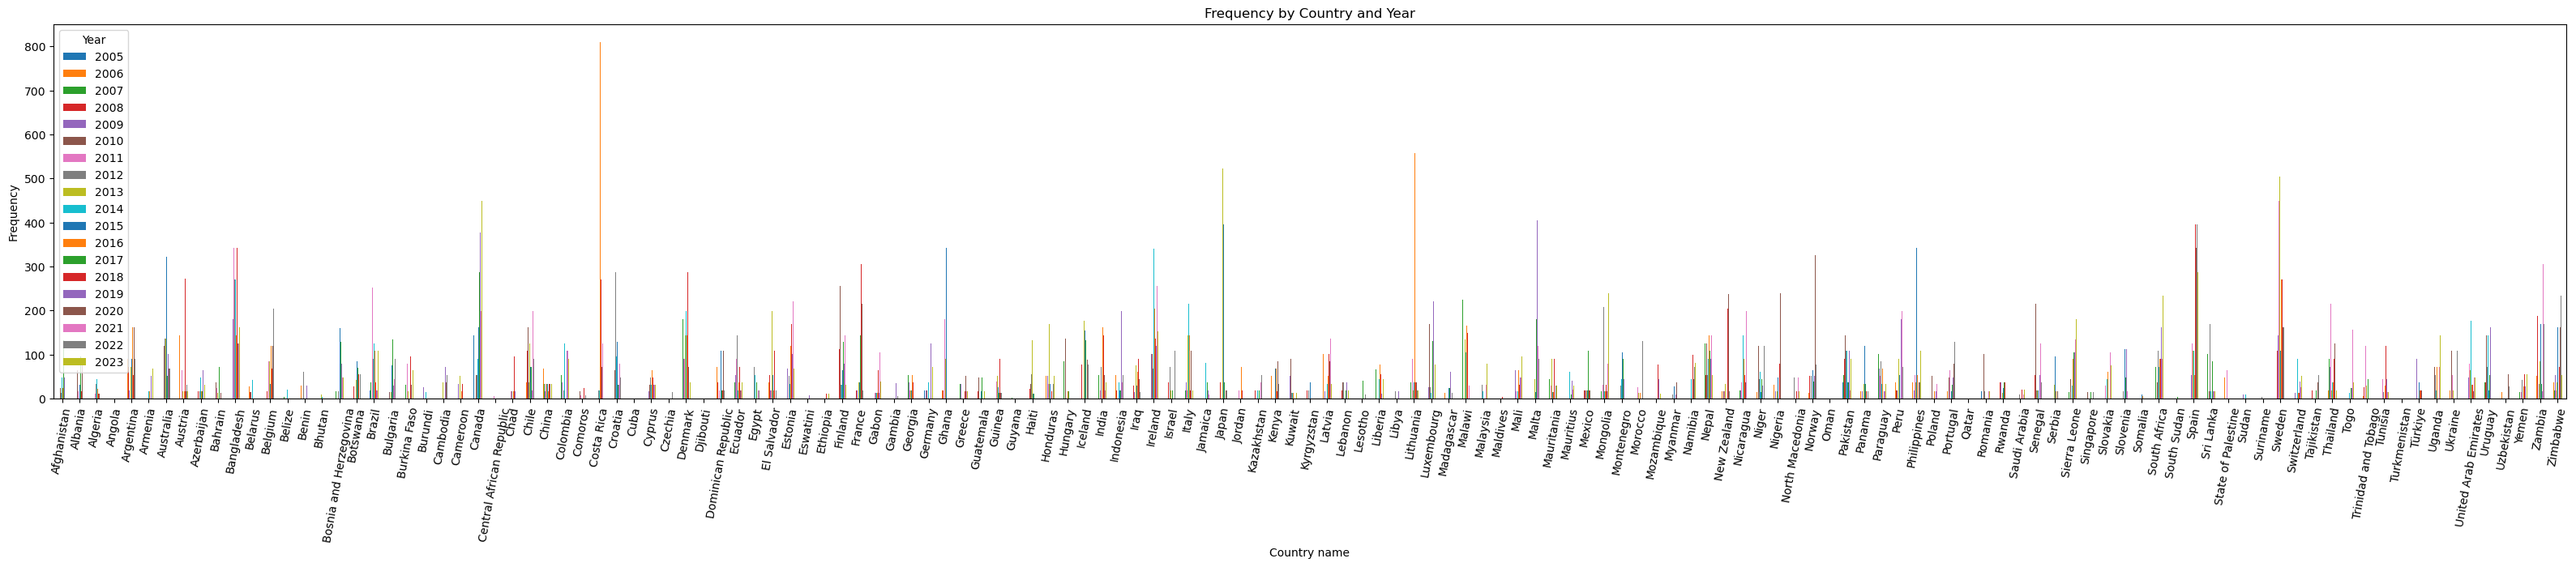

Country name
Sweden        3168
Costa Rica    2466
Bangladesh    2358
Spain         1998
Ireland       1972
Name: freq, dtype: int64


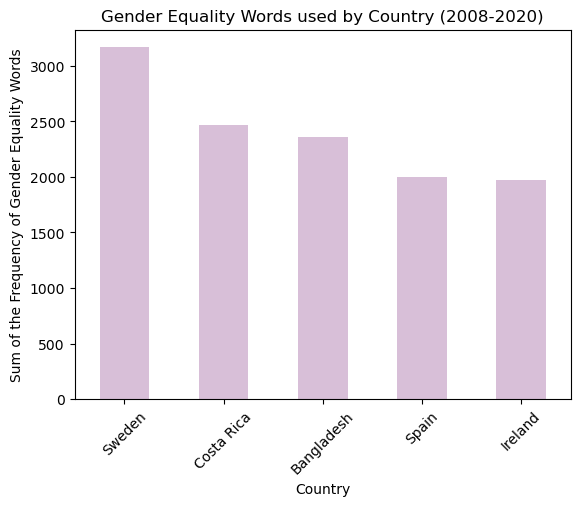

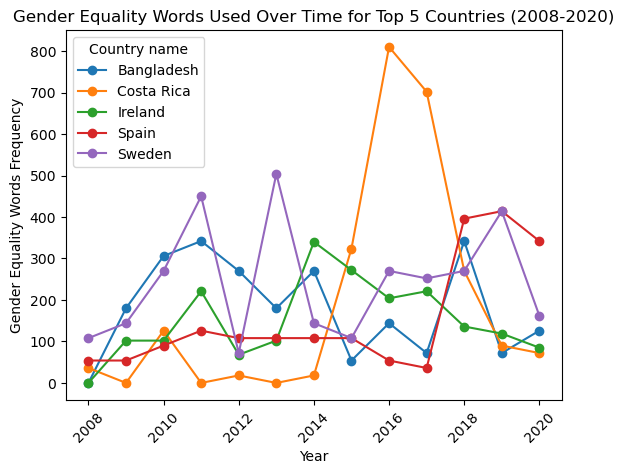

In [50]:
# plot the words to visually see if each year has a pattern
import matplotlib.pyplot as plt

# let's visualize the total data of countries vs frequency of words used in gender equality
reset_index = final_df.reset_index()
reset_index.groupby(['Country name', 'Year'])['freq'].sum().unstack().plot(kind='bar', figsize=(40, 6))
# plot 
plt.title('Frequency by Country and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()

# Let's look at the top countries over a year range that use those words
# define the range
start_year = 2008
end_year = 2020
# Filter the DataFrame for the specific range of years using the 'Year' column
df_range = final_df[final_df['Year'].between(start_year, end_year)]
# Sum the word frequencies for all words to get total word frequency per country
df_country_word1 = df_range.groupby('Country name')['freq'].sum()
df_top5 = df_country_word1.sort_values(ascending=False).head(5)
# View the result
print(df_top5)
# Plot the sum of 'freq' for each country in the selected year range
df_top5.plot(kind='bar', color='thistle')

# Add labels and title
plt.title(f'Gender Equality Words used by Country ({start_year}-{end_year})')
plt.xlabel('Country')
plt.ylabel('Sum of the Frequency of Gender Equality Words')
plt.xticks(rotation=45)
plt.show()


# Another option here is to plot the freq of words used over that year range
# Step 6: Filter the original DataFrame to only include rows for the top 5 countries
top_countries = df_country_word1.sort_values(ascending=False).head(5).index
df_top_countries = df_range[df_range['Country name'].isin(top_countries)]

# Step 7: Group by both 'Country' and 'Year', summing the 'word1' frequency
df_grouped = df_top_countries.groupby(['Country name', 'Year']).agg({'freq': 'sum'}).reset_index()

# Step 7: Pivot the data for easier plotting (Country vs. Year for 'word1' frequency)
df_pivot = df_grouped.pivot(index='Year', columns='Country name', values='freq')

# Step 8: Plot the frequencies of 'word1' over time for the top 5 countries
df_pivot.plot(kind='line', marker='o')

# Add labels and title
plt.title(f'Gender Equality Words Used Over Time for Top 5 Countries ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Gender Equality Words Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()

ValueError: Could not interpret value `countries` for parameter `x`

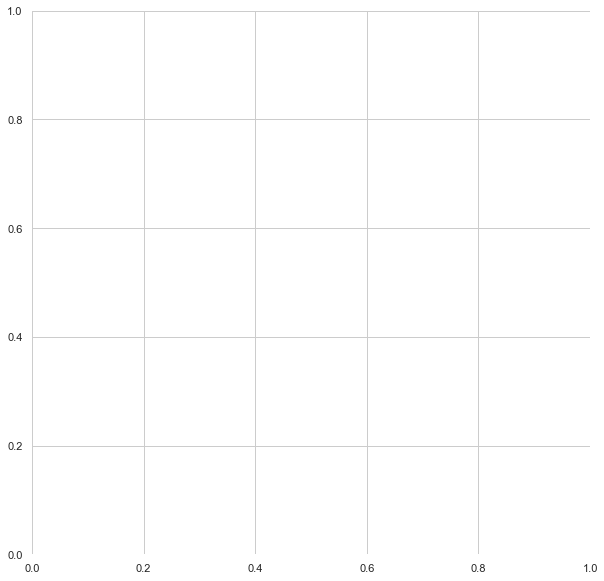

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# reset_index = final_df.reset_index()

# reset_index.groupby(['Country name', 'Year'])['freq'].sum().unstack().plot(kind='bar', figsize=(40, 6))
# plt.title('Frequency by Country and Year')
# plt.ylabel('Frequency')
# plt.xlabel('Country')
# plt.xticks(rotation=45)
# plt.show()

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="countries", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [206]:
# **FEATURE EXTRACTION/FEATURE ENGINEERING**
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# set my train and test data
train_data = final_df[(final_df['Year'] >= 2010) & (final_df['Year'] <= 2020)].dropna()
test_data = final_df[(final_df['Year'] == 2023)].dropna()

# lets drop columns so both data frames are easier to read
train_data = train_data.drop(['Region Name', 'Sub-region Name', 'ISO-alpha3 Code', 'Session', 'Speech', 'Social support', 
                 'Healthy life expectancy at birth', 'Generosity', 'Perceptions of corruption', 'Positive affect', 
                 'Negative affect'],axis = 1)

test_data = test_data.drop(['Region Name', 'Sub-region Name', 'ISO-alpha3 Code', 'Session', 'Speech', 'Social support', 
                 'Healthy life expectancy at birth', 'Generosity', 'Perceptions of corruption', 'Positive affect', 
                 'Negative affect'],axis = 1)

train_data

,Country name,Life Ladder,Log GDP per capita,Freedom to make life choices,freq,Year
0,Algeria,5.463567,9.306355,0.592696,0,2010
1,Algeria,5.463567,9.306355,0.592696,1,2011
2,Algeria,5.463567,9.306355,0.592696,3,2012
3,Algeria,5.463567,9.306355,0.592696,4,2014
4,Algeria,5.463567,9.306355,0.592696,2,2016
...,...,...,...,...,...,...
32122,New Zealand,6.975955,10.719568,0.876608,0,2016
32123,New Zealand,6.975955,10.719568,0.876608,0,2017
32124,New Zealand,6.975955,10.719568,0.876608,12,2018
32125,New Zealand,6.975955,10.719568,0.876608,2,2019


In [238]:
# we need to transform the columns Life ladder, Log GDP per capita and freq to a 0-1 scale
# creat an instance of MinMaxScaler
scaler = MinMaxScaler()

# select the cloumns you want to scale
columns_to_scale = ['Life Ladder', 'Log GDP per capita', 'freq']

# fit and transform the selected columns, and assign them back to the data frame
train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

train_data

,Country name,Life Ladder,Log GDP per capita,Freedom to make life choices,freq,Year
0,Algeria,0.562446,0.532542,0.592696,0.000000,2010
1,Algeria,0.562446,0.532542,0.592696,0.022222,2011
2,Algeria,0.562446,0.532542,0.592696,0.066667,2012
3,Algeria,0.562446,0.532542,0.592696,0.088889,2014
4,Algeria,0.562446,0.532542,0.592696,0.044444,2016
...,...,...,...,...,...,...
32122,New Zealand,0.821412,0.811374,0.876608,0.000000,2016
32123,New Zealand,0.821412,0.811374,0.876608,0.000000,2017
32124,New Zealand,0.821412,0.811374,0.876608,0.266667,2018
32125,New Zealand,0.821412,0.811374,0.876608,0.044444,2019


<AxesSubplot:xlabel='Life Ladder', ylabel='Log GDP per capita'>

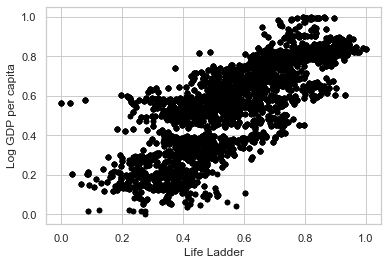

In [240]:
train_data.plot.scatter(x="Life Ladder", y="Log GDP per capita",c='black')

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Life Ladder'>

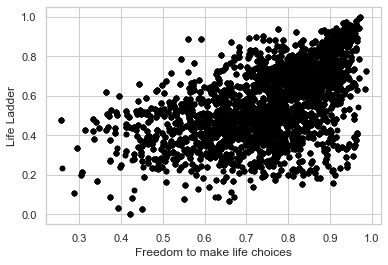

In [241]:
train_data.plot.scatter(x="Freedom to make life choices", y="Life Ladder",c='black')

<AxesSubplot:xlabel='freq', ylabel='Freedom to make life choices'>

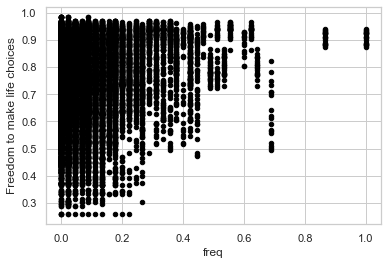

In [279]:
train_data.plot.scatter(x="freq", y="Freedom to make life choices",c='black')

In [272]:
# split our data
X = train_data['freq'].values

Y = train_data['Life Ladder'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [277]:
# **MACHINE LEARNING MODEL**
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Calculate MSE and R2
from sklearn.metrics import mean_squared_error, r2_score

# initial model evaluation


# Create grid of parameters to test through cross-validation
param_grid = {'polynomialfeatures__degree': np.arange(5),
              'linearregression__fit_intercept': [True, False]}

model = make_pipeline(PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(X_train[:, np.newaxis], y_train);

# Let us know check the results with the best estimator after Grid Search
print("Best hyperparameters found:")
print(grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test[:, np.newaxis])
print("")

# Compute test error and variance score
print("Model accuracy:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("")

Best hyperparameters found:
{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

Model accuracy:
Mean squared error: 0.04
Variance score: 0.04



Plot:


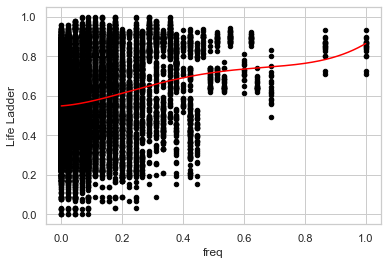

In [278]:
#Plot with test data and fitted model
print("Plot:")
train_data.plot.scatter(x="freq", y="Life Ladder",c='black')
xfit = np.linspace(min(X_test), max(X_test), 1000)
yfit = grid.best_estimator_.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, c='red');

In [261]:
# since this data does not look linear I am going to try using random forest as this model doesn't require the data to be linear
from sklearn.ensemble import RandomForestRegressor

# initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# we must reshape the freq data to a 2d array for random forest
# split our data
X = train_data['freq'].values.reshape(-1,1)

Y = train_data['Life Ladder'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

# fit the model
rf_model.fit(X_train, y_train)

# predict on the test data
y_pred_rf = rf_model.predict(X_test)

# evalute the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')   

Random Forest Mean Squared Error: 0.034322801277274544
Random Forest R-squared: 0.051216402741661504


In [ ]:
# we get similar scores between linear regression and random forest, both of these models have quite a small R-squared value
# Both of the models predict only 5% of the variance which could indicate that freq isn't a strong predictor for Life Ladder.